# (Collisional excitation / collisional de-excitation) + (radiative ionization / radiatve recombination + dielectronic recombination)

In [63]:
import numpy as np
import matplotlib.pyplot as plt

import lss

from utils import *

In [64]:
element = lss.O1Inasan()
"""
13S3S - fast level
12P1D4 - 
"""
# element.keys = element.all_keys
# element.keys = ["12P3P4", "12P1D4", "22P4S"]
element.keys = ["12P3P4", "13S3S", "22P4S"]

population_nlte_1 = [0.0 for _ in range(len(element.keys))]
# population_nlte_1[0] = 1.0
population_nlte_1[0] = 0.0
population_nlte_1[1] = 0.0
population_nlte_1[2] = 1.0

delta_time = 0.01
# delta_time = 1.0e-20
# delta_time = 1.0e-30

count = int(1e4)
temperatures = np.full(count, 1.0e4)
electron_temperatures = np.full(count, 1.0e4)
# electron_number_densities = np.linspace(1.0e1, 1.0e10, num=count)
electron_number_densities = np.linspace(1.0e1, 1.0e20, num=count)
optical_depth = 0.0

In [65]:
se = ["se_nist_o1"]
ce_balance = ["ce_regemorter"]
ri_balance = ["pi_tasitsiomi", "rr_badnell_verner", "dr_badnell"]

b_factors = calculate_b_factors(
    element=element,
    population_nlte_1=population_nlte_1,
    temperatures=temperatures,
    electron_temperatures=electron_temperatures,
    electron_number_densities=electron_number_densities,
    optical_depth=optical_depth,
    delta_time=delta_time,
    transitions_types=[
        *se,
        *ce_balance,
        *ri_balance
    ]
)

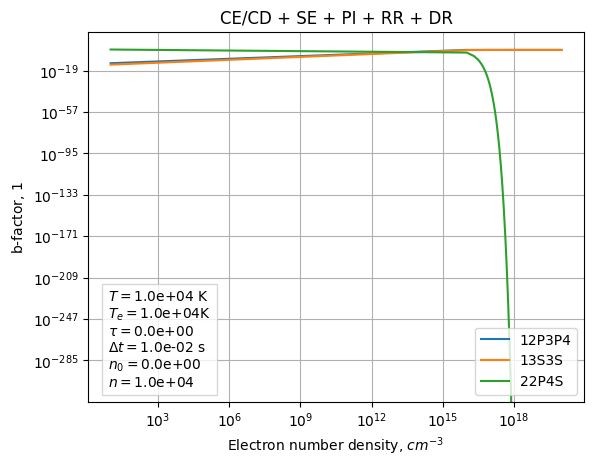

In [68]:
fig, ax = plt.subplots()

# for i, key in enumerate(element.keys):
#     plt.plot(
#         electron_number_densities,
#         b_factors.T[i],
#         label=key,
#     )
plt.plot(electron_number_densities, b_factors.T[0], label="12P3P4")
plt.plot(electron_number_densities, b_factors.T[1], label="13S3S")
plt.plot(electron_number_densities, b_factors.T[2], label="22P4S")

plt.title("CE/CD + SE + PI + RR + DR")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Electron number density, $cm^{-3}$")
plt.ylabel("b-factor, $1$")
plt.legend(loc='lower right')
plt.text(
    0.04,
    0.04,
    f"$T = ${'{:.1e}'.format(temperatures[0])} K\n"
    f"$T_e = ${'{:.1e}'.format(electron_temperatures[0])}K\n"
    f"$\\tau = ${'{:.1e}'.format(optical_depth)}\n"
    f"$\\Delta t = ${'{:.1e}'.format(delta_time)} s\n"
    f"$n_0 = ${'{:.1e}'.format(population_nlte_1[0])}\n"
    f"$n = ${'{:.1e}'.format(count)}",
    transform = ax.transAxes,
    bbox={'facecolor': 'white', 'alpha': 0.8, 'edgecolor': (0.8, 0.8, 0.8)}
)
plt.grid()
plt.show()